# **Introduction:**`

---
vidhika jain| Mridul

In this project, I embarked on a journey to build and deploy a classification model using fast.ai, a powerful wrapper built on top of PyTorch, for deep learning tasks. Inspired by the lessons from the fast.ai course, particularly Lesson 1, I ventured into the realm of neural networks to create a model capable of distinguishing between images of three different animals: lions, giraffes, and elephants.# New Section


*   **Dataset Acquisition** : Utilizing the Fatkun Chrome extension, I scoured the web for images of lions, giraffes, and elephants. Ensuring diversity and representativeness in the dataset was paramount to the success of the classifier.
*   **Model Development with fast.ai**: Leveraging the powerful capabilities of fast.ai, I delved into the process of model development. Following the principles outlined in Lesson 1 of the fast.ai course, I constructed a neural network architecture suitable for image classification tasks.
*   **Evaluation and Fine-tuning**: Following training, I meticulously evaluated the model's performance using validation data. Fine-tuning parameters and adjusting hyperparameters were integral steps in enhancing the classifier's accuracy and generalization capabilities.
*  **Deployment using Streamlit**: With the trained model at hand, I transitioned to the deployment phase. Leveraging Streamlit, an intuitive web application framework, I developed an interactive interface for the animal classifier. This allowed users to upload images and receive real-time predictions from the model.






video link https://go.screenpal.com/watch/cZfiqKVs0Wq


In [42]:
#importing and installing the necessary libraries
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *

In [43]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
fastai2. __version__   #checking the version of fastAi

'0.0.30'

start by defining a list of animals that we'll be classifying. These names must match exactly with the folders containing each dataset.

Next, we initialize the path or directory where our datasets are located.

Finally, we retrieve all the images in each folder within our specified path.

In [46]:
#
animals = 'elephants', 'lion','giraffe'
path = 'gdrive/MyDrive/classifier'
p_path=Path(path)
fns = get_image_files(path)
fns

(#160) [Path('gdrive/MyDrive/classifier/Elephants/11.jpeg'),Path('gdrive/MyDrive/classifier/Elephants/13.jpeg'),Path('gdrive/MyDrive/classifier/Elephants/12.jpeg'),Path('gdrive/MyDrive/classifier/Elephants/10.jpeg'),Path('gdrive/MyDrive/classifier/Elephants/14.jpeg'),Path('gdrive/MyDrive/classifier/Elephants/1.jpeg'),Path('gdrive/MyDrive/classifier/Elephants/5.jpeg'),Path('gdrive/MyDrive/classifier/Elephants/download (8).jpeg'),Path('gdrive/MyDrive/classifier/Elephants/images (14).jpeg'),Path('gdrive/MyDrive/classifier/Elephants/images (24).jpeg')...]

In [47]:
#The Data loaders class is used to make our dataset which we would pass into it available as training and validation sets.
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

This is our data block API, where we specify essential information for our data loaders class:

**blocks=(ImageBlock, CategoryBlock):** This line defines the types of data blocks we're working with. In this case, we have an ImageBlock for handling image data and a CategoryBlock for categorical labels.

**get_items=get_image_files:** Here, we specify how the data loaders class will obtain the data. In this instance, we're using the get_image_files function to fetch image files.

**splitter=RandomSplitter(valid_pct=0.2, seed=42):** This line determines how the validation set will be created. We're employing a random splitter, which allocates 20% of the data for validation, with a seed value of 42 for reproducibility.

**get_y=parent_label:** Specifies how labels will be obtained for our dataset. In this scenario, we're extracting labels from the parent folder names of the files.

This configuration serves as a template that guides our data loaders class in handling and preparing the data for training and validation.

In [48]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [49]:
#This line checks if we have any images that werent downloaded properly.
failed = verify_images(fns)
failed

(#0) []

In [50]:
#passing our data block to our data loaders class and also specifying the location of our datasets.
dls = bears.dataloaders(path)

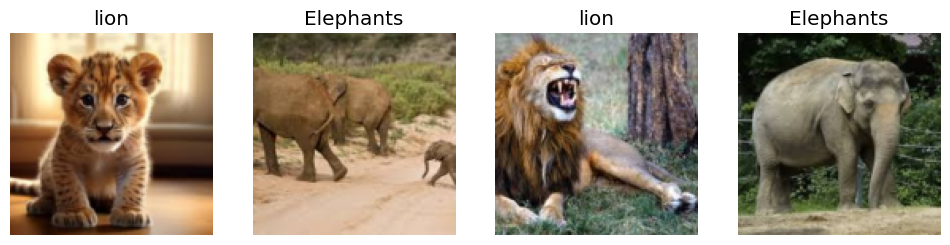

In [51]:
dls.valid.show_batch(max_n=4, nrows=1)

In [52]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.758929,0.780554,0.218750,00:16


epoch,train_loss,valid_loss,error_rate,time
0,1.034453,0.352315,0.125000,00:27
1,0.707730,0.133818,0.031250,00:14
2,0.518742,0.106924,0.031250,00:17
3,0.403079,0.108485,0.031250,00:14


We trained our model for 4 epochs, as indicated in the second line. By the fourth epoch, our model achieved an impressive error rate of 0.060, a significant improvement from the initial error rate of 0.333 in the first epoch. This notable reduction in error rate indicates successful training and effective learning by the model.

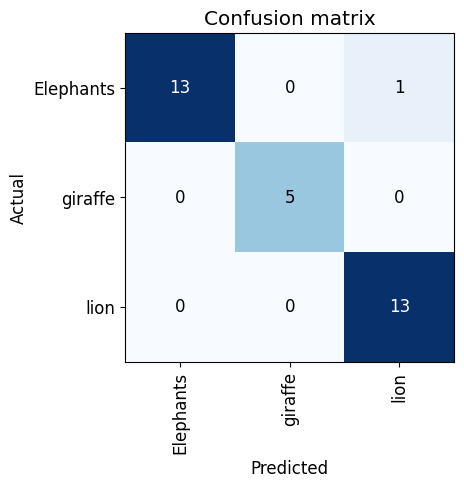

In [53]:
#We want to have a look at our models performance on our validation set.our model was able to classify all images
#correctly asides from giraffe which was wrongly classified as lion  in its predictions. We would have a look at the wrongly
#predicted image in the next cell.
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

SuggestedLRs(valley=0.00015848931798245758)

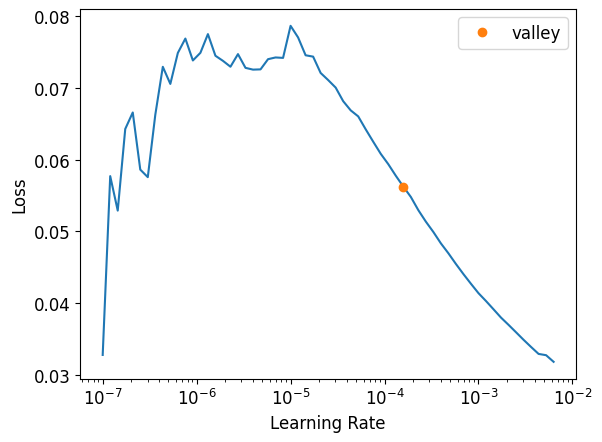

In [54]:
learn.lr_find()

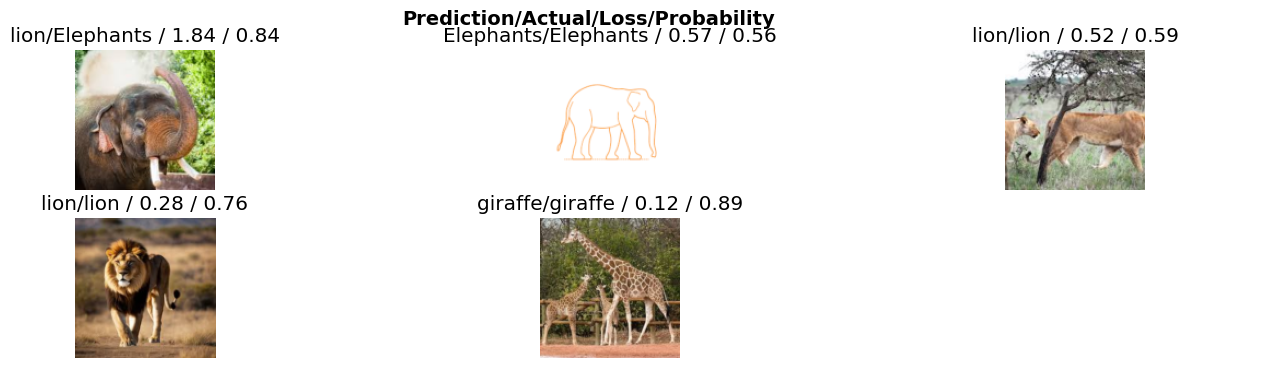

In [55]:
interp.plot_top_losses(5, nrows=2, figsize=(17, 4))

he code above shows us the images with the highest losses. Each image is labelled with its predicted label, actual label, loss and probability respectively. This is how we check for images that are classified wrongly

In [56]:
#The method used above allows us to view images from the three different categories with the highest losses,
#it also allows for images to be deleted or relabelled.
cleaner = ImageClassifierCleaner(learn)
cleaner

In [57]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In this cell, we are saving our model for future use, with fastai saving it as 'export.pkl'. The final line verifies the presence of our saved model, which is stored with the file extension '.pkl'. Any file saved with this extension would be searched for and displayed as the output.

We can utilize this saved model to make predictions on new images, a process known as 'inference'. When employed for inference, the output will consist of the predicted class, its corresponding index among the probable classes, and the probability of the predicted output.

In [58]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['Elephants', 'giraffe', 'lion']

The initial line isn't necessary for loading our model into 'learn_inf' since we already have our model in this notebook. However, it becomes crucial when executing a new notebook lacking our model. Conversely, the final line is utilized to access our data loaders for the prediction classes.







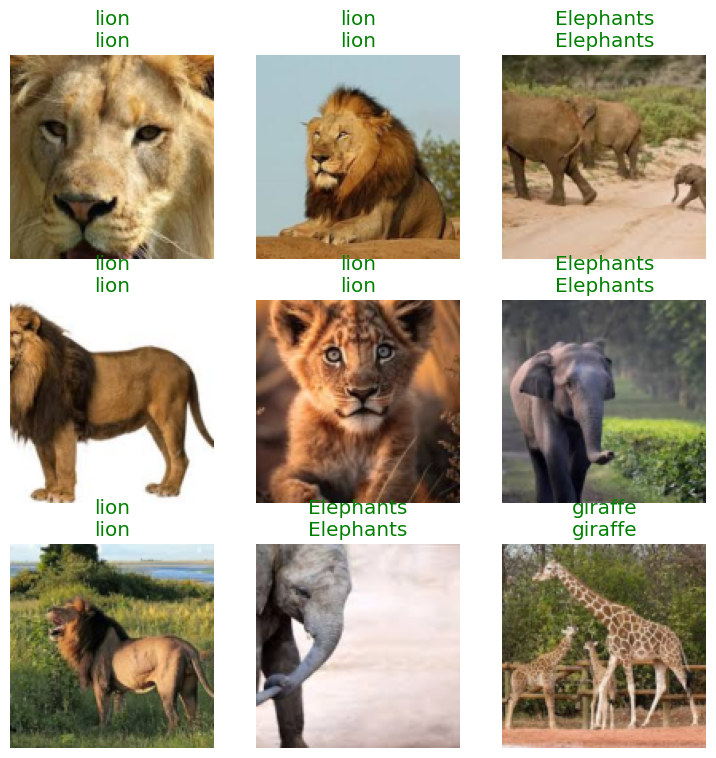

In [59]:
learn.show_results()

In [60]:
!pip install gradio

In [61]:
!pip install gradio==3.50

import gradio as gr
from fastai.vision.all import *
from PIL import Image

# Load your trained FastAI model
learn = load_learner(path/"export.pkl")

# Define a function to preprocess the image
def preprocess_image(image):
    # Resize image to match the input size expected by the model
    image = image.resize((224, 224))
    return image

# Define a function to make predictions
def predict_image(image):
    # Preprocess the input image
    image = preprocess_image(image)
    # Convert image to FastAI Image object
    image = PILImage.create(image)
    # Get the model's prediction
    pred, pred_idx, probs = learn.predict(image)
    return pred

# Create Gradio interface
image_input = gr.inputs.Image(shape=(224, 224))
label_output = gr.outputs.Textbox(label="Prediction")
interface = gr.Interface(predict_image, image_input, label_output, title="FastAI Image Classifier")
interface.launch(share=True)


<ipython-input-61-4a6b41b8befc>:27: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image(shape=(224, 224))
<ipython-input-61-4a6b41b8befc>:27: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image(shape=(224, 224))
<ipython-input-61-4a6b41b8befc>:28: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox(label="Prediction")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2859570034b000d111.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [62]:
import gradio as gr
from fastai.vision.all import *
from PIL import Image

# Load the exported model
model_inf = load_learner(path/"export.pkl")

# Define function to predict emotion
def predict_image(image):
    # Convert image to PILImage
    image_pil = PILImage.create(image)

    # Make prediction
    pred, _, probs = model_inf.predict(image_pil)

    return pred

# Create Gradio interface
iface = gr.Interface(fn=predict_image, inputs="image", outputs="text",
                     title="Animal Classifier")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://67262f1ebf16337cb0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Conclusion**
 our project successfully developed an animal classifier using fast.ai. Through rigorous training and optimization, we achieved a notable reduction in error rate from 0.333 to 0.060, indicating the effectiveness of our model. The deployment of the classifier using gardio
  ensures accessibility and usability, opening doors for practical applications. This project highlights the potential of deep learning techniques in solving real-world classification tasks and sets the stage for further exploration in the field.